In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Data Collection

In [3]:
data = pd.read_csv('./Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
print(type(data))
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Handling the missing values

In [10]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

C:\Users\aarad\AppData\Local\Temp\ipykernel_17820\586448211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [11]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [12]:
# delete the null values
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.shape

(889, 11)

Data Analysis

In [15]:
# getting some statistical measures about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# finding the number of people survived and not survived
data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

Data Visulization

In [17]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


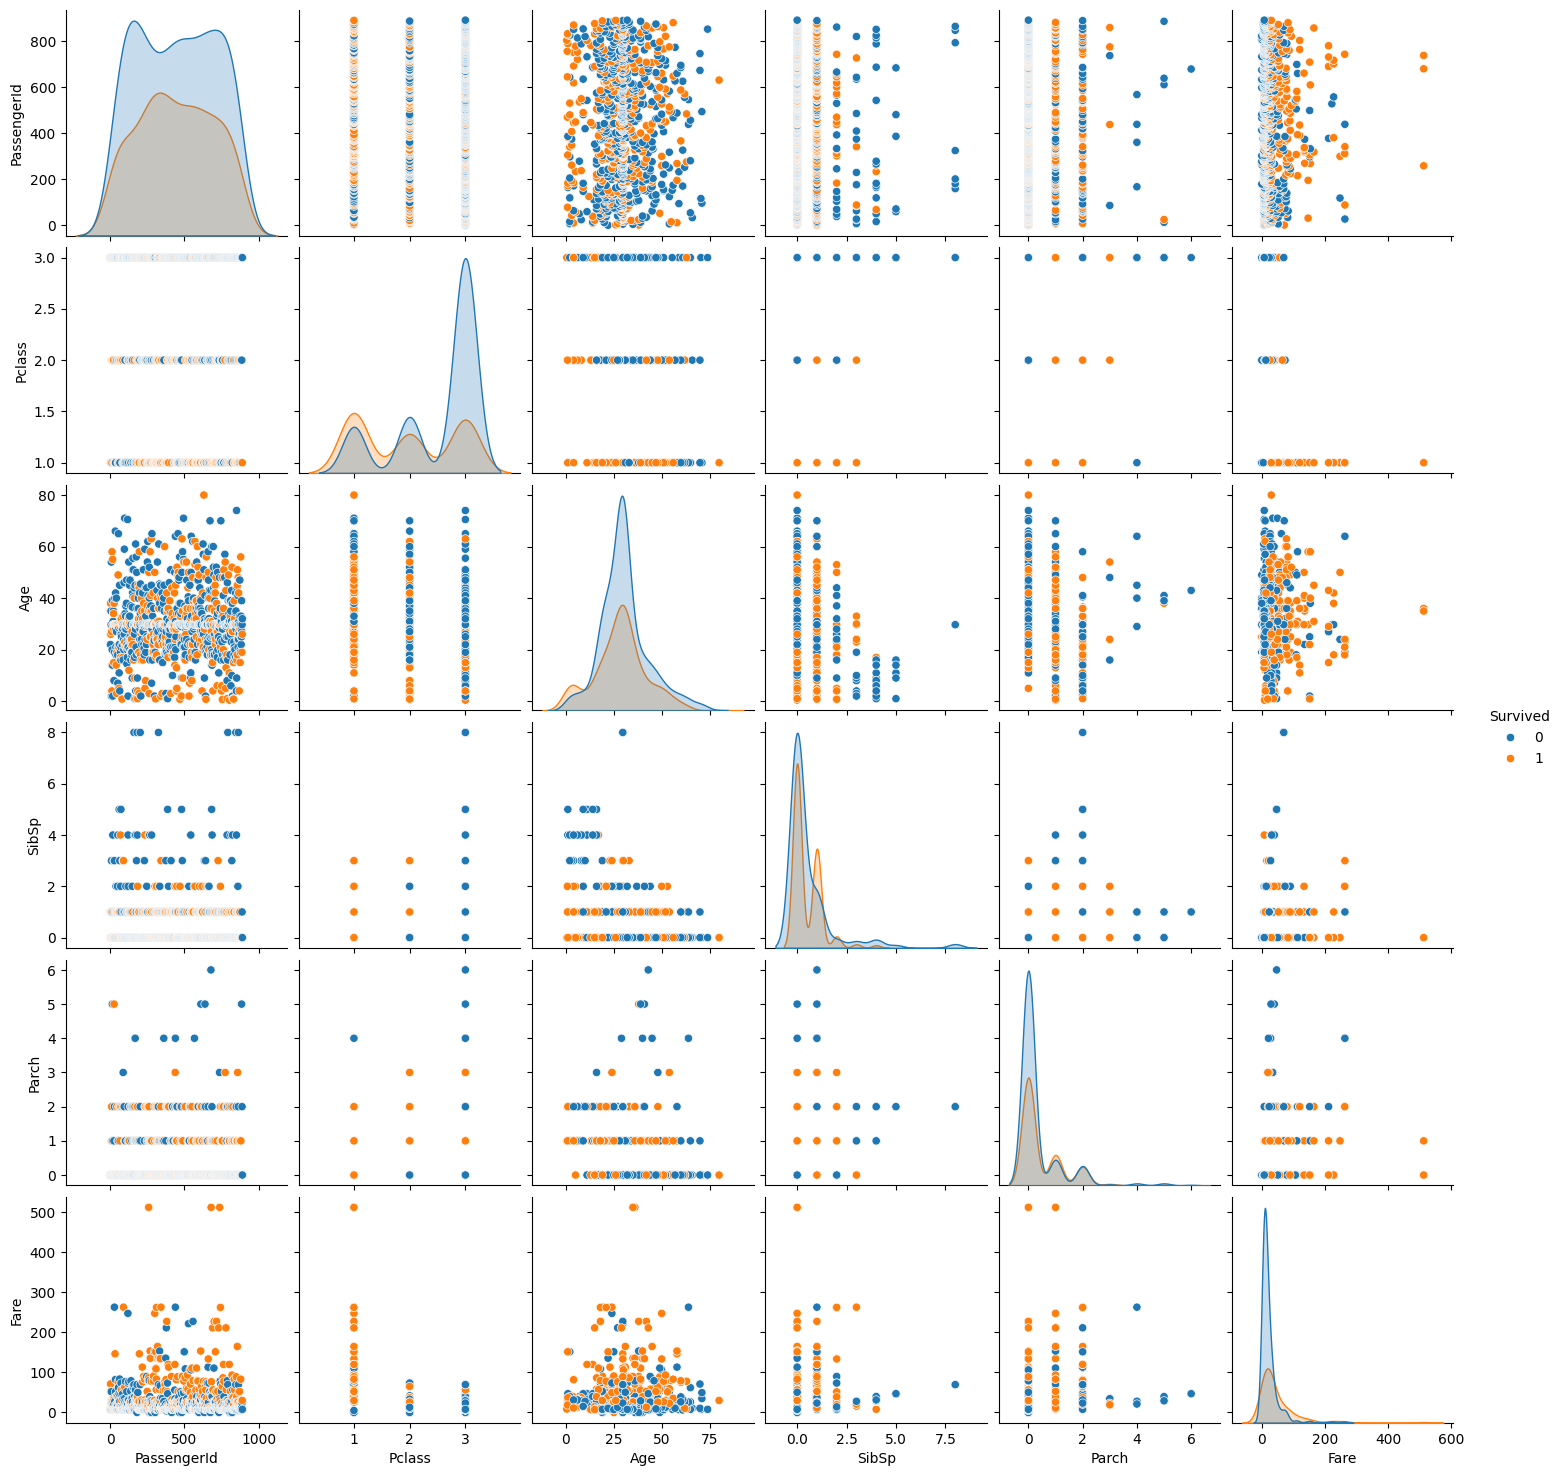

In [19]:
sns.pairplot(data, hue='Survived')

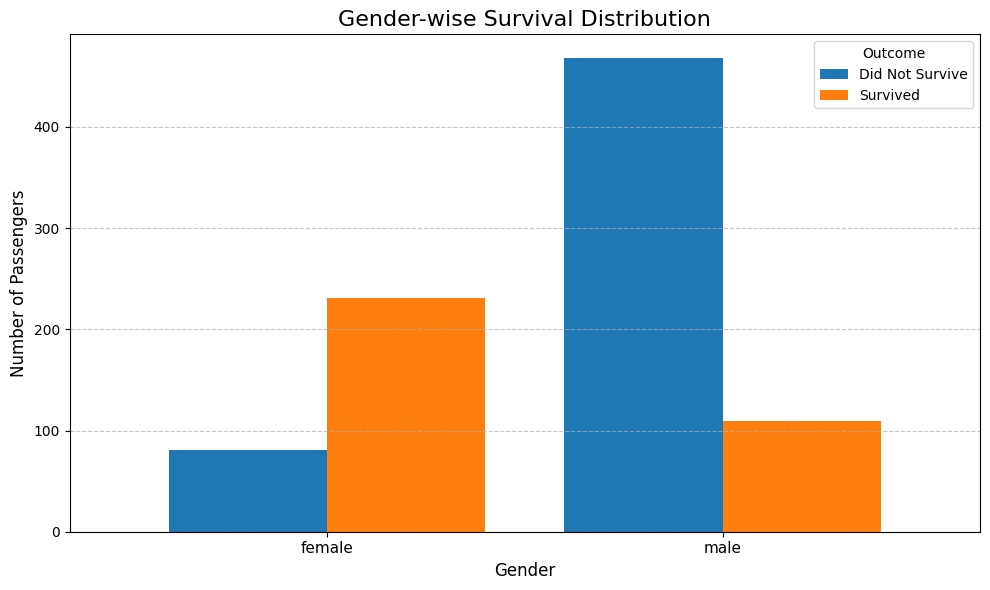

In [20]:
# Gender-wise survival distribution
gender_survival = data.groupby(['Sex', 'Survived']).size().unstack()
# Plot a double bar graph
ax = gender_survival.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Gender-wise Survival Distribution', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(['Did Not Survive', 'Survived'], title='Outcome', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


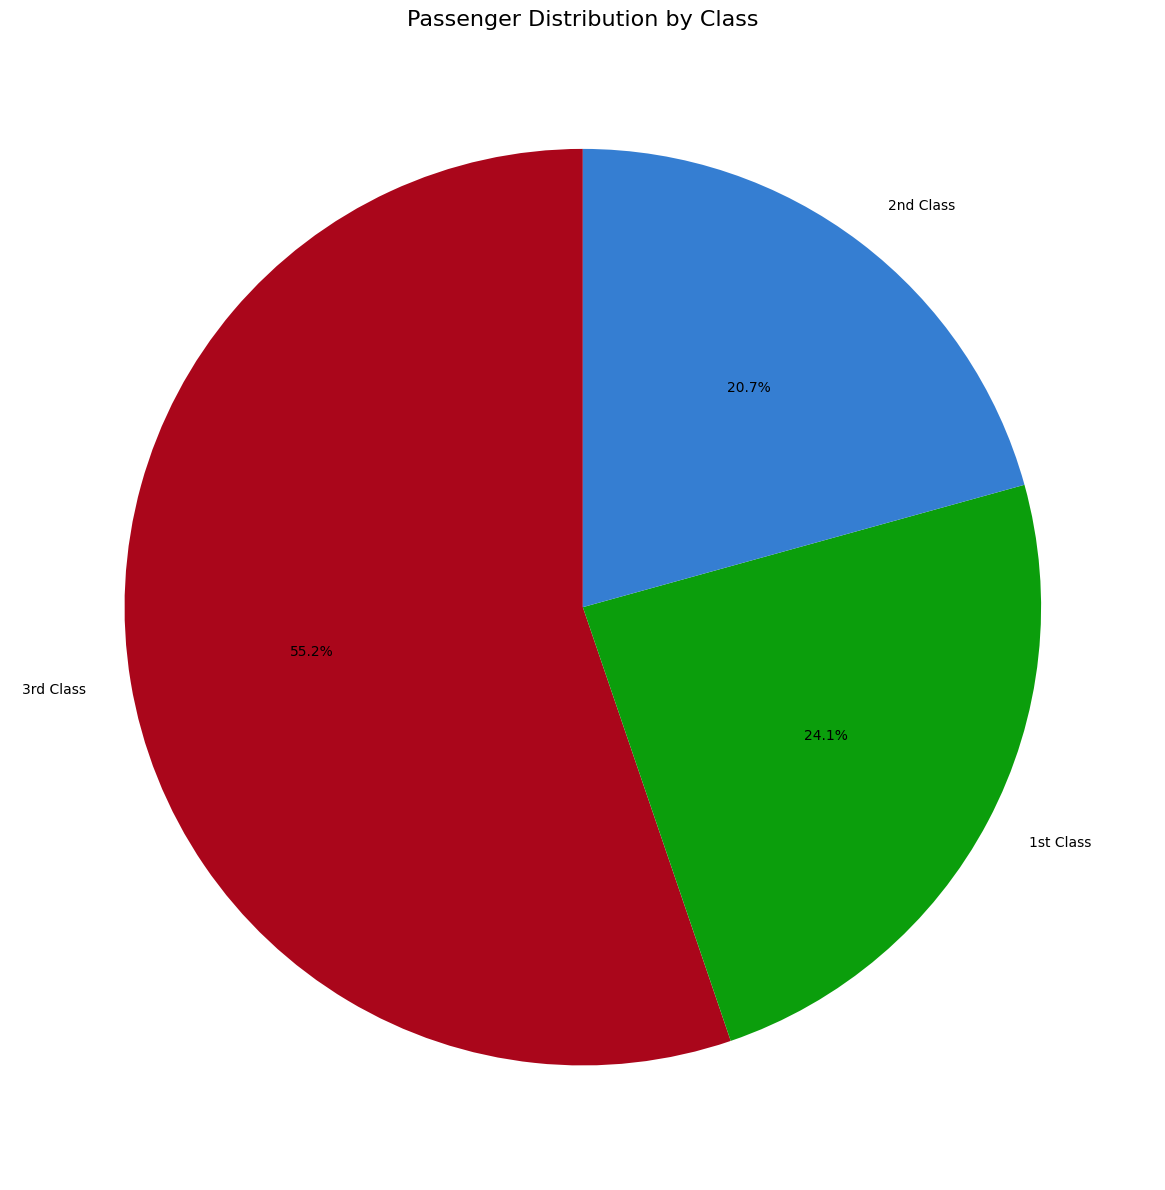

In [21]:
# Count the number of passengers in each class
class_distribution = data['Pclass'].value_counts()

# Plot a pie chart for class distribution
plt.figure(figsize=(12, 12))
class_distribution.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#aa061b','#0b9e0c','#357ed2'], 
    labels=['3rd Class', '1st Class', '2nd Class'], 
    explode=[0, 0, 0]
)

# Customize the plot
plt.title('Passenger Distribution by Class', fontsize=16)
plt.ylabel('')  # Remove y-axis label for a cleaner look

# Show the plot
plt.tight_layout()
plt.show()


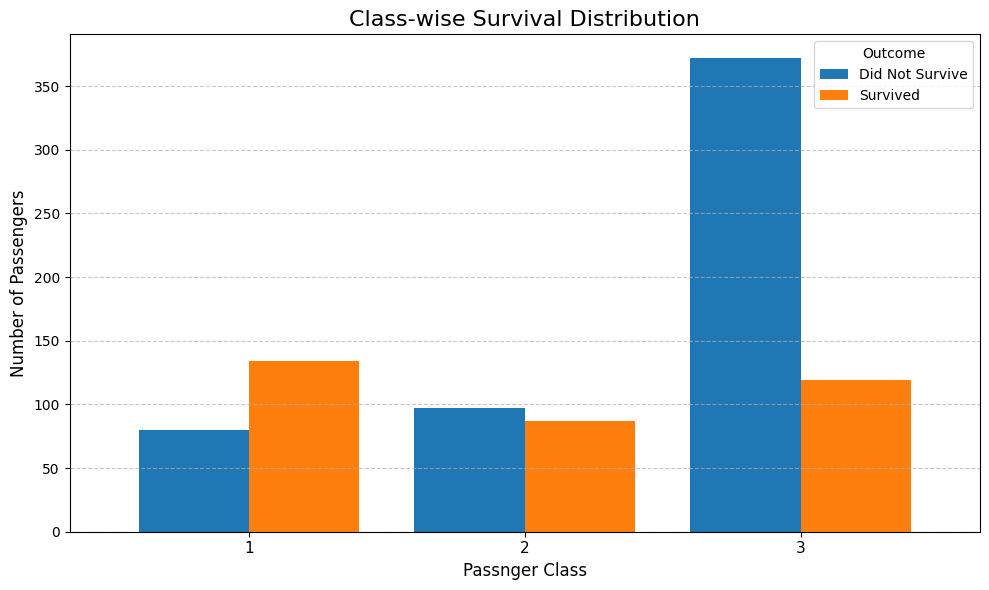

In [22]:
# Class-wise survival distribution
class_survival = data.groupby(['Pclass', 'Survived']).size().unstack()
# Plot a double bar graph
ax = class_survival.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Class-wise Survival Distribution', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xlabel('Passnger Class', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.legend(['Did Not Survive', 'Survived'], title='Outcome', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
data['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [24]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
# Encoding the Categorical Columns
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

C:\Users\aarad\AppData\Local\Temp\ipykernel_17820\336388279.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Seperating Features and Target

In [27]:
# Feature Engineering
# Encode categorical variables: 'Sex' and 'Embarked'
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])

le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# Create FamilySize feature
data['FamilySize'] = data['SibSp'] + data['Parch']

# Create IsAlone feature
data['IsAlone'] = (data['FamilySize'] == 0).astype(int)

# Drop unnecessary columns for modeling
features = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])

# Target variable
target = data['Survived']

# Scale numerical features: 'Age' and 'Fare'
scaler = StandardScaler()
features[['Age', 'Fare']] = scaler.fit_transform(features[['Age', 'Fare']])



In [28]:
print(features)
print(target)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  FamilySize  \
0         3    0 -0.590495      1      0 -0.500240         0           1   
1         1    1  0.643971      1      0  0.788947         1           1   
2         3    1 -0.281878      0      0 -0.486650         0           0   
3         1    1  0.412509      1      0  0.422861         0           1   
4         3    0  0.412509      0      0 -0.484133         0           0   
..      ...  ...       ...    ...    ...       ...       ...         ...   
886       2    0 -0.204724      0      0 -0.384475         0           0   
887       1    1 -0.821957      0      0 -0.042213         0           0   
888       3    1  0.003524      1      2 -0.174084         0           3   
889       1    0 -0.281878      0      0 -0.042213         1           0   
890       3    0  0.181046      0      0 -0.490173         2           0   

     IsAlone  
0          0  
1          0  
2          1  
3          0  
4          1

In [29]:
# Defining the training and testing data
X_train, X_test, Y_train, Y_test = tts(features, target, test_size=0.2, random_state=42)
print(features.shape, X_train.shape, X_test.shape)

(889, 9) (711, 9) (178, 9)


Model Training

Logistic Regression

In [34]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

In [32]:
model_pred = model.predict(X_test)
print(model_pred)

[0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1]


Model Evaluation

Accuracy Score

In [40]:
data_accuracy = accuracy_score(Y_train, model_pred)
print('Accuracy score of training data : ', data_accuracy*100, '%')

Accuracy score of training data :  80.73136427566807 %


In [36]:
# Accuracy Score on test data
X_test_pred = model.predict(X_test)
print(X_test_pred)

[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1]


In [37]:
test_data_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy score of test data : ', test_data_accuracy)

print("\nClassification Report:")
print(classification_report(Y_test, X_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, X_test_pred))

Accuracy score of test data :  0.8033707865168539

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178


Confusion Matrix:
[[90 19]
 [16 53]]


                                                    Thank You                                                                         .